In [1]:
import yfinance as yf

# g_df = yf.download('GLD', start='2010-01-01')['Adj Close'].round(4)
# s_df = yf.download('GDX', start='2010-01-01')['Adj Close'].round(4)


# VIX는 투자자들이 향후 30일간 S&P 500지수가 얼마나 변동할 것인지를 반영한 지수이다.
# 투자자들이 투자 결정을 내리기 전에 시장 리스크, 공포 및 스트레스를 측정하는 데 사용한다.
columns = ['GLD', 'GDX']


f_df = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
f_df

[*********************100%%**********************]  2 of 2 completed


Ticker,GDX,GLD
Date,,
2010-01-04,42.1804,109.80
2010-01-05,42.5871,109.70
2010-01-06,43.6214,111.51
2010-01-07,43.4093,110.82
2010-01-08,44.0635,111.37
...,...,...
2024-06-10,34.0300,213.54
2024-06-11,33.7500,214.15
2024-06-12,34.0000,214.72


In [2]:
original_index = f_df.index

# MinMaxScaler를 사용하여 0에서 1 사이로 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(f_df)

# 스케일된 데이터를 DataFrame으로 변환하고 인덱스 복원
scaled_df = pd.DataFrame(scaled_data, columns=f_df.columns, index=original_index)

# 한 개의 플롯에 두 시리즈를 겹쳐 그리기
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(scaled_df['GDX'], label='stock')
ax.plot(scaled_df['GLD'], label='gold')

# 범례 추가
ax.legend()

# 플롯 보여주기
plt.show()

NameError: name 'MinMaxScaler' is not defined

전체적으로 한번 수익률 확인해보기 

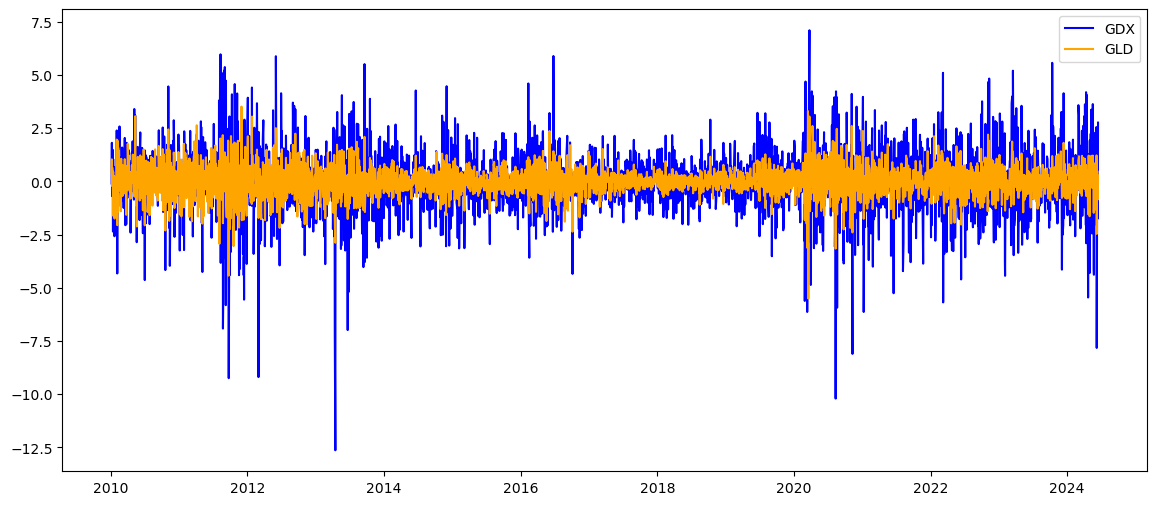

In [7]:
import matplotlib.pyplot as plt

# 데이터프레임의 차분 계산
diff_df = f_df.diff()

# 차분 결과를 겹쳐서 그리기
fig, ax = plt.subplots(figsize=(14, 6))

# 첫 번째 컬럼에 대해 다른 색상 지정
ax.plot(diff_df.iloc[:, 1], label=diff_df.columns[0], color='blue')  # 원래 첫 번째 컬럼을 파란색으로 지정

# 두 번째 컬럼에 대해 다른 색상 지정
ax.plot(diff_df.iloc[:, 0], label=diff_df.columns[1], color='orange')  # 원래 두 번째 컬럼을 주황색으로 지정

# 범례 추가
ax.legend()

# 플롯 보여주기
plt.show()


<Axes: xlabel='Ticker'>

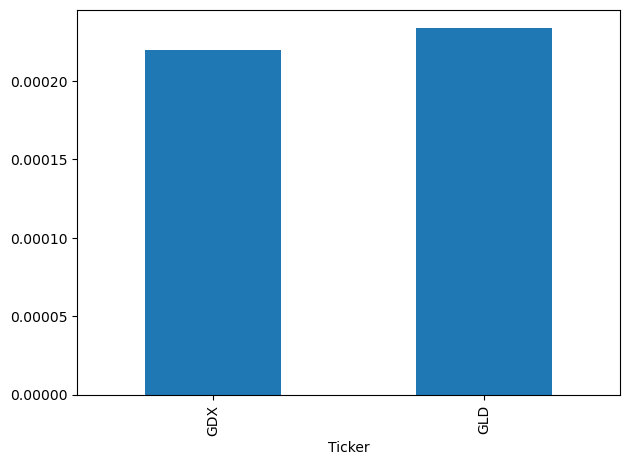

In [40]:
f_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))

In [41]:
import numpy as np

rate_f_df = np.log(f_df / f_df.shift(1))
rate_f_df

Ticker,GDX,GLD
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.009596,-0.000911
2010-01-06,0.023996,0.016365
2010-01-07,-0.004874,-0.006207
2010-01-08,0.014958,0.004951
...,...,...
2024-06-10,0.014504,0.009126
2024-06-11,-0.008262,0.002853
2024-06-12,0.007380,0.002658


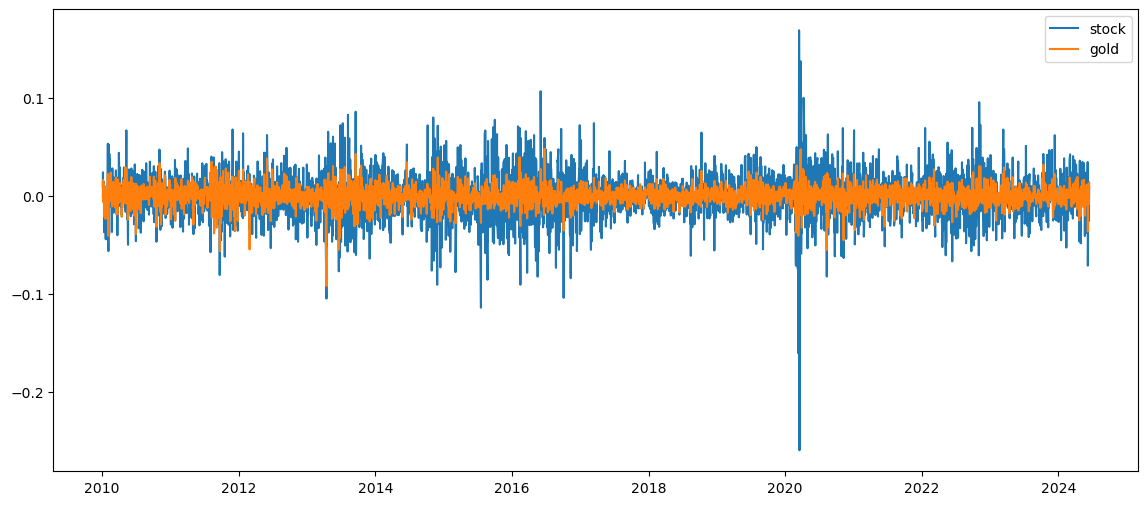

In [42]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(rate_f_df['GDX'], label='stock')
ax.plot(rate_f_df['GLD'], label='gold')

# 범례 추가
ax.legend()

# 플롯 보여주기
plt.show()

확실히 주식에 비해서 주가가 안정적이라는 모습을 볼 수 있다.

In [43]:
# 연율화
# 연간 영업일(약 252일로 계산)
rate_f_df.mean() * 252

Ticker
GDX   -0.016155
GLD    0.046808
dtype: float64

In [44]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [45]:
rate_f_df = rate_f_df.dropna()
get_vif(rate_f_df)

,vif_score,feature
0,2.296662,GDX
1,2.296662,GLD


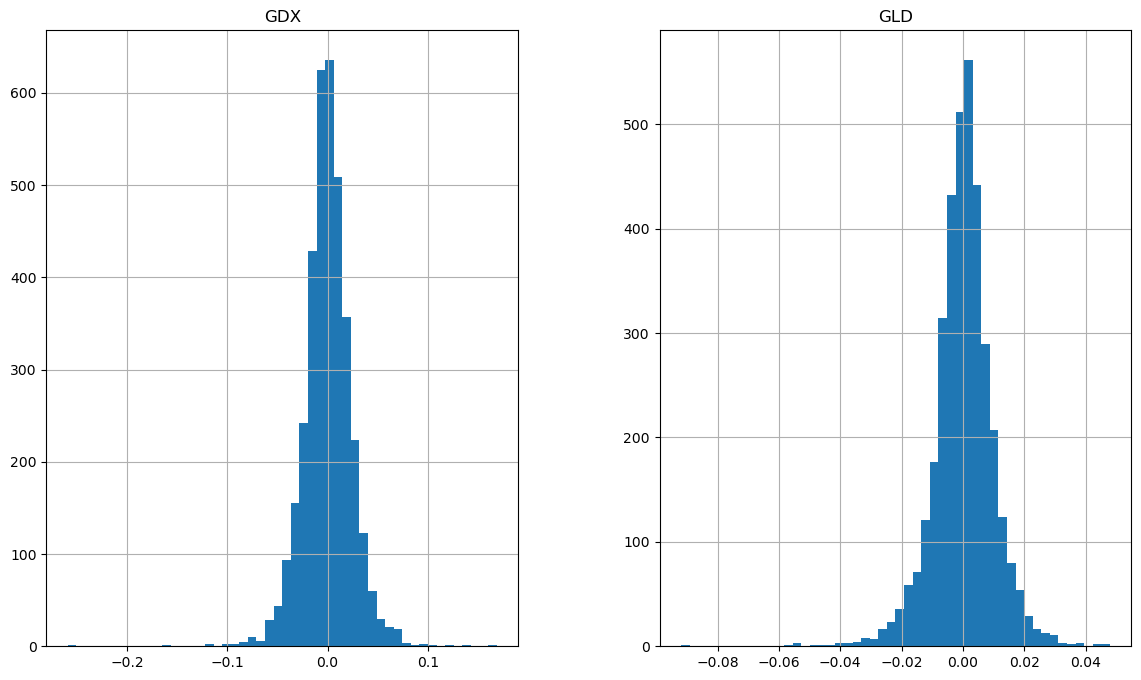

In [46]:
rate_f_df.hist(figsize=(14, 8), bins=50)
plt.show()

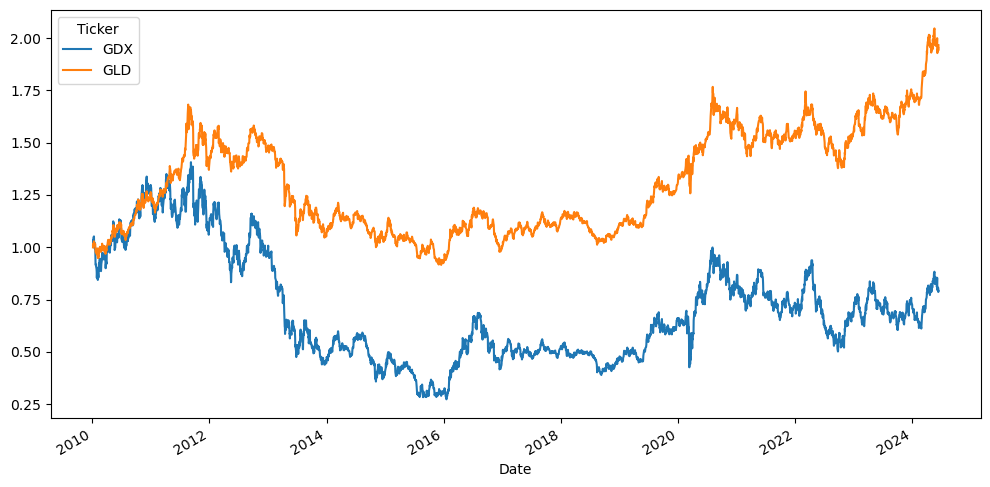

In [47]:
# 일간 수익률
rate_f_df.cumsum().apply(np.exp).plot(figsize=(12, 6))

plt.show()

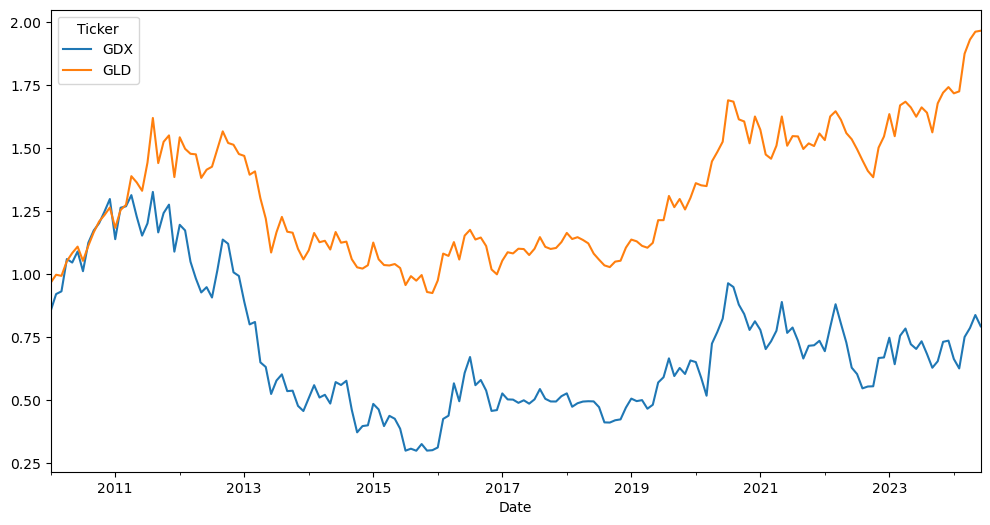

In [54]:
# 월간 수익률
rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

In [56]:
s_df = f_df[['GDX']].dropna()
s_df

Ticker,GDX
Date,
2010-01-04,42.1804
2010-01-05,42.5871
2010-01-06,43.6214
2010-01-07,43.4093
2010-01-08,44.0635
...,...
2024-06-10,34.0300
2024-06-11,33.7500
2024-06-12,34.0000


In [57]:
window = 20

s_df['min'] = s_df['GDX'].rolling(window=window).min()
s_df['mean'] = s_df['GDX'].rolling(window=window).mean()
s_df['std'] = s_df['GDX'].rolling(window=window).std()
s_df['median'] = s_df['GDX'].rolling(window=window).median()
s_df['max'] = s_df['GDX'].rolling(window=window).max()

s_df.dropna()

Ticker,GDX,min,mean,std,median,max
Date,,,,,,
2010-02-01,37.9632,36.0005,40.820630,2.673721,42.04335,44.3553
2010-02-02,38.0163,36.0005,40.612425,2.723921,41.17695,44.3553
2010-02-03,37.6361,36.0005,40.364875,2.759755,39.57230,44.3553
2010-02-04,35.5762,35.5762,39.962615,2.845115,38.69700,44.3553
2010-02-05,37.4946,35.5762,39.666880,2.774519,38.43175,44.3553
...,...,...,...,...,...,...
2024-06-10,34.0300,33.5400,35.431500,0.945718,35.42500,37.2400
2024-06-11,33.7500,33.5400,35.371500,1.013510,35.42500,37.2400
2024-06-12,34.0000,33.5400,35.301500,1.058774,35.37500,37.2400


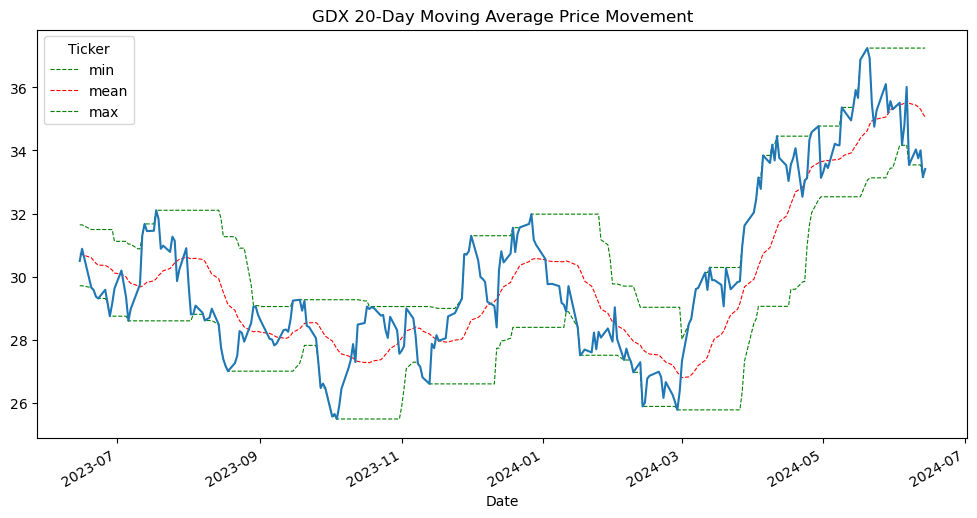

In [59]:
import matplotlib.pyplot as plt

ax = s_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
s_df['GDX'].iloc[-252:].plot(ax=ax)
plt.title("GDX 20-Day Moving Average Price Movement")
plt.show()

In [61]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

s_df['SMA1'] = s_df['GDX'].rolling(window=21).mean() #short-term
s_df['SMA2'] = s_df['GDX'].rolling(window=252).mean() #long-term
s_df[['GDX', 'SMA1', 'SMA2']].tail()

Ticker,GDX,SMA1,SMA2
Date,,,
2024-06-10,34.03,35.422857,29.944498
2024-06-11,33.75,35.351429,29.957085
2024-06-12,34.00,35.306190,29.970040
2024-06-13,33.15,35.199048,29.980989
2024-06-14,33.41,35.080000,29.993047


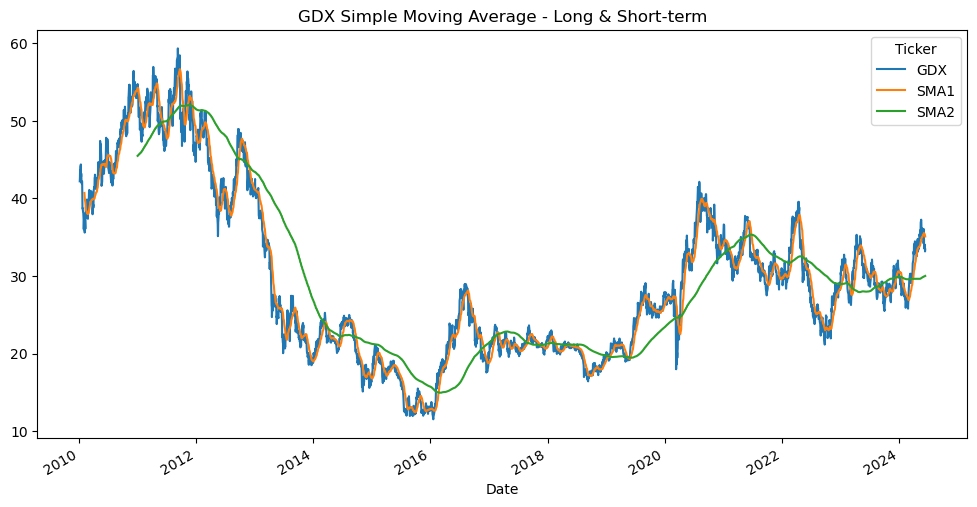

In [62]:
s_df[['GDX', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("GDX Simple Moving Average - Long & Short-term")
plt.show()

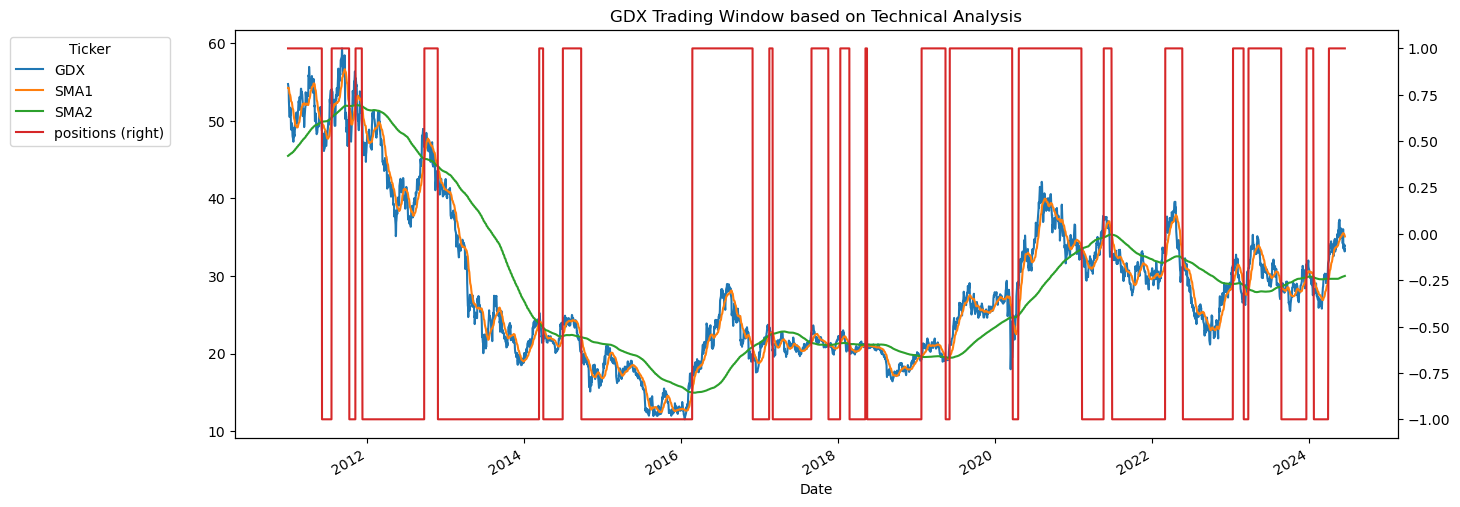

In [63]:
# 아마존 주가 기술 분석
# 골든 크로스, 데드 크로스
s_df.dropna(inplace=True)

s_df['positions'] = np.where(s_df['SMA1'] > s_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = s_df[['GDX', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("GDX Trading Window based on Technical Analysis")
plt.show()

In [8]:
import yfinance as yf

# g_df = yf.download('GLD', start='2010-01-01')['Adj Close'].round(4)
# s_df = yf.download('GDX', start='2010-01-01')['Adj Close'].round(4)


# VIX는 투자자들이 향후 30일간 S&P 500지수가 얼마나 변동할 것인지를 반영한 지수이다.
# 투자자들이 투자 결정을 내리기 전에 시장 리스크, 공포 및 스트레스를 측정하는 데 사용한다.
columns = ['GLD', 'GDX']


f_df = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
f_df

[*********************100%%**********************]  2 of 2 completed


Ticker,GDX,GLD
Date,,
2010-01-04,42.1804,109.80
2010-01-05,42.5871,109.70
2010-01-06,43.6215,111.51
2010-01-07,43.4093,110.82
2010-01-08,44.0635,111.37
...,...,...
2024-06-11,33.7500,214.15
2024-06-12,34.0000,214.72
2024-06-13,33.1500,212.97


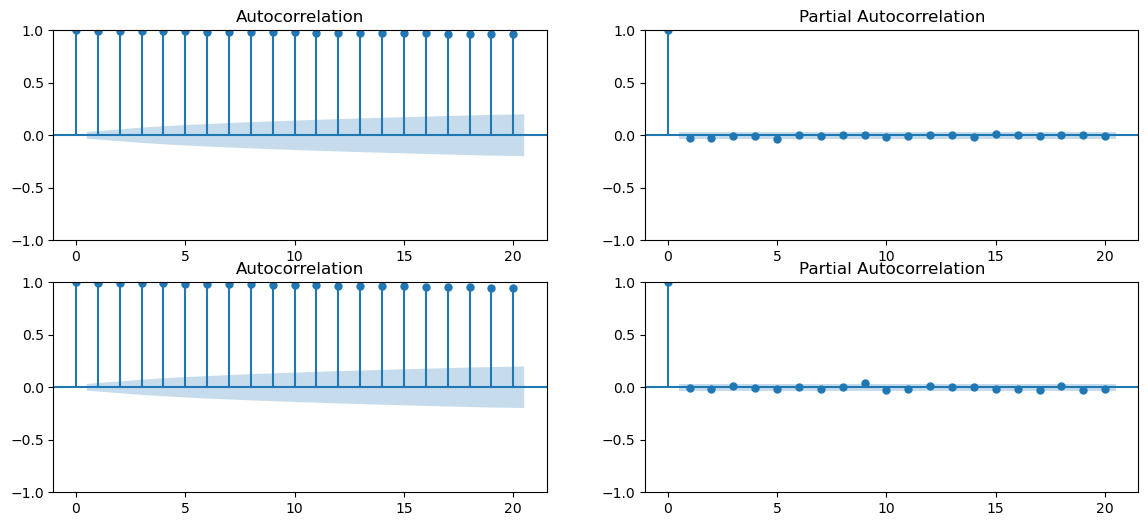

In [46]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
a = f_df['GLD']
b = f_df['GDX']
fig, ax = plt.subplots(2, 2, figsize=(14, 6))

plot_acf(b, lags=20, ax=ax[0][0])
plot_pacf(b.diff().dropna(), lags=20, ax=ax[0][1])

plot_acf(a, lags=20, ax=ax[1][0])
plot_pacf(a.diff().dropna(), lags=20, ax=ax[1][1])
plt.show()

In [9]:
pre_f_df = f_df.dropna()
pre_f_df

Ticker,GDX,GLD
Date,,
2010-01-04,42.1804,109.80
2010-01-05,42.5871,109.70
2010-01-06,43.6215,111.51
2010-01-07,43.4093,110.82
2010-01-08,44.0635,111.37
...,...,...
2024-06-11,33.7500,214.15
2024-06-12,34.0000,214.72
2024-06-13,33.1500,212.97


In [39]:
g_df = pre_f_df[['GLD']].iloc[-1000:]
s_df = pre_f_df[['GDX']].iloc[-1000:]

In [40]:
g_y_train = g_df['GLD'][:int(0.8 * len(g_df))]
g_y_test = g_df['GLD'][int(0.8 * len(g_df)):]

s_y_train = s_df['GDX'][:int(0.8 * len(s_df))]
s_y_test = s_df['GDX'][int(0.8 * len(s_df)):]

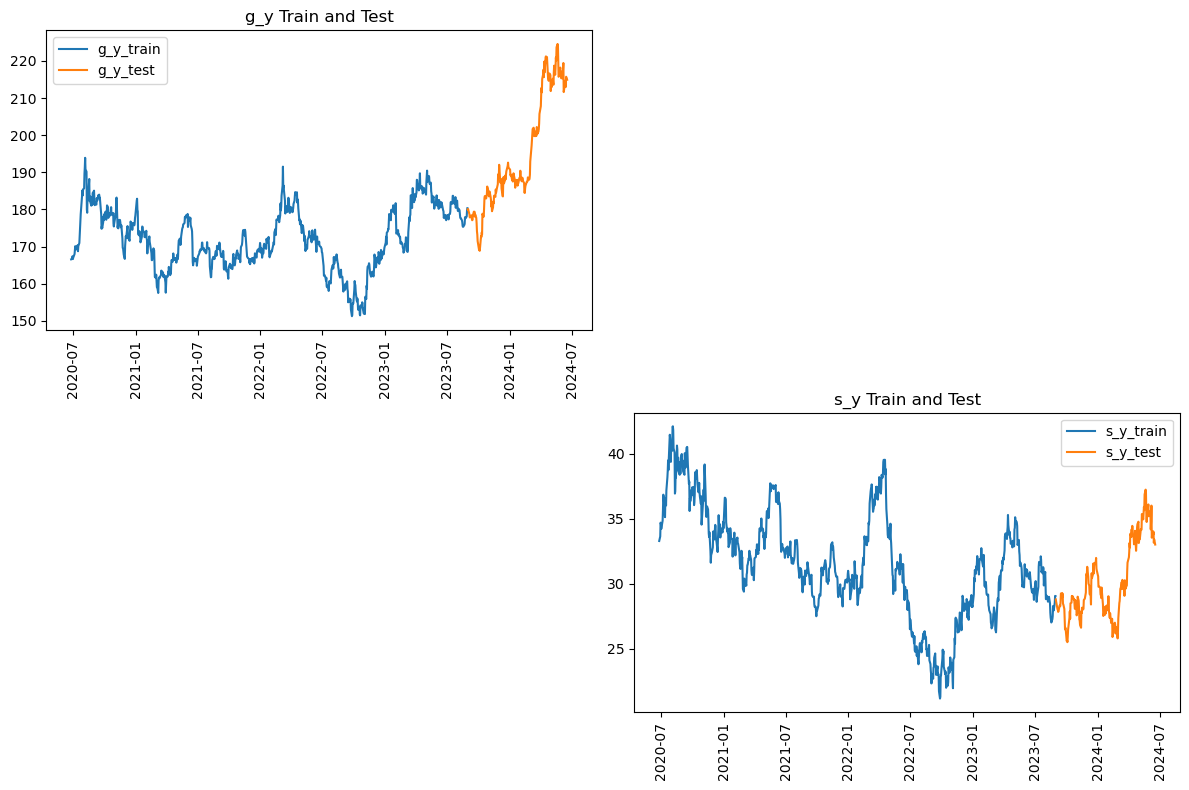

In [41]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 왼쪽 위
axs[0, 0].plot(g_y_train.index, g_y_train, label='g_y_train')
axs[0, 0].plot(g_y_test.index, g_y_test, label='g_y_test')
axs[0, 0].set_title('g_y Train and Test')
axs[0, 0].legend()
axs[0, 0].tick_params(axis='x', rotation=90)  # x축 눈금 레이블 세로로 회전

# 오른쪽 아래
axs[1, 1].plot(s_y_train.index, s_y_train, label='s_y_train')
axs[1, 1].plot(s_y_test.index, s_y_test, label='s_y_test')
axs[1, 1].set_title('s_y Train and Test')
axs[1, 1].legend()
axs[1, 1].tick_params(axis='x', rotation=90)  # x축 눈금 레이블 세로로 회전

# 빈 그래프 지우기
fig.delaxes(axs[0, 1])
fig.delaxes(axs[1, 0])

# 플롯 보여주기
plt.tight_layout()
plt.show()


In [54]:
from pmdarima.arima import ndiffs
# KPSS(Kwaiatkowski-Phillips-Schmidt-Shin)
# 차분을 진행하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 검정 방법
# 영가설(귀무가설)을 "데이터에 정상성이 나타난다."로 설정한 뒤
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다.
kpss_diffs = ndiffs(g_y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(g_y_train, alpha=0.05, test='adf', max_d=6)
pp_diffs = ndiffs(g_y_train, alpha=0.05, test='pp', max_d=6)

n_diffs = max(kpss_diffs, adf_diffs, pp_diffs)

print(f'd = {n_diffs}')

d = 1


In [72]:
import pmdarima as pm

model = pm.auto_arima(y=g_y_train, 
                      d=1, 
                      start_p=0, max_p=10, 
                      start_q=0, max_q=10, 
                      m=1, seasonal=False, 
                      stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3052.652, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3054.074, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3053.963, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3050.741, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3052.489, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.405 seconds


In [73]:
model.fit(g_y_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [57]:
# Prob(Q), 융-박스 검정 통계량
# 영가설: 잔차가 백색잡음 시계열을 따른다.
# 0.05 이상: 서로 독립이고 동일한 분포를 따른다.

# Prob(H), 이분산성 검정 통계량
# 영가설: 잔차가 이분산성을 띠지 않는다.
# 0.05 이상: 잔차의 분산이 일정하다.

# Prob(JB), 자크-베라 검정 통계량
# 영가설: 잔차가 정규성을 따른다.
# 0.05 이상: 일정한 평균과 분산을 따른다.

# Skew(쏠린 정도, 왜도)
# 0에 가까워야 한다.

# Kurtosis(뾰족한 정도, 첨도)
# 3에 가까워야 한다.

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  800
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1524.371
Date:                Mon, 17 Jun 2024   AIC                           3050.741
Time:                        23:57:54   BIC                           3055.425
Sample:                             0   HQIC                          3052.541
                                - 800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.6586      0.083     32.129      0.000       2.496       2.821
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):               387.33
Prob(Q):                              0.45   Pr

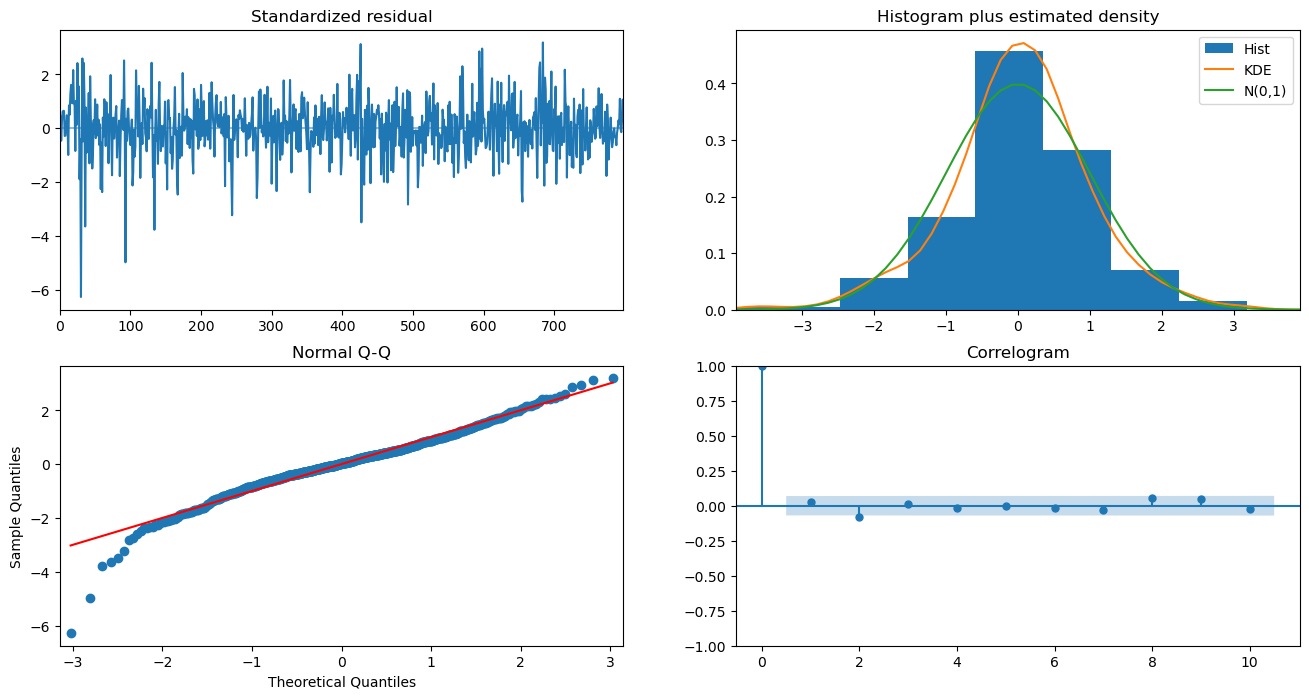

In [58]:
import matplotlib.pyplot as plt

model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [78]:
from pmdarima.arima import ndiffs
# KPSS(Kwaiatkowski-Phillips-Schmidt-Shin)
# 차분을 진행하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 검정 방법
# 영가설(귀무가설)을 "데이터에 정상성이 나타난다."로 설정한 뒤
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다.
kpss_diffs = ndiffs(s_y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(s_y_train, alpha=0.05, test='adf', max_d=6)
pp_diffs = ndiffs(s_y_train, alpha=0.05, test='pp', max_d=6)

n_diffs = max(kpss_diffs, adf_diffs, pp_diffs)

print(f'd = {n_diffs}')

d = 1


In [79]:
import pmdarima as pm

model = pm.auto_arima(y=s_y_train, 
                      d=1, 
                      start_p=0, max_p=10, 
                      start_q=0, max_q=10, 
                      m=1, seasonal=False, 
                      stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1685.665, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1687.318, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1687.303, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1683.712, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1688.484, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.634 seconds


In [53]:
# Prob(Q), 융-박스 검정 통계량
# 영가설: 잔차가 백색잡음 시계열을 따른다.
# 0.05 이상: 서로 독립이고 동일한 분포를 따른다.

# Prob(H), 이분산성 검정 통계량
# 영가설: 잔차가 이분산성을 띠지 않는다.
# 0.05 이상: 잔차의 분산이 일정하다.

# Prob(JB), 자크-베라 검정 통계량
# 영가설: 잔차가 정규성을 따른다.
# 0.05 이상: 일정한 평균과 분산을 따른다.

# Skew(쏠린 정도, 왜도)
# 0에 가까워야 한다.

# Kurtosis(뾰족한 정도, 첨도)
# 3에 가까워야 한다.

model.fit(s_y_train)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  800
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -840.856
Date:                Mon, 17 Jun 2024   AIC                           1683.712
Time:                        23:57:03   BIC                           1688.395
Sample:                             0   HQIC                          1685.511
                                - 800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4804      0.019     25.540      0.000       0.444       0.517
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                53.92
Prob(Q):                              0.55   Pr

사실상 둘다 진짜 이상적임

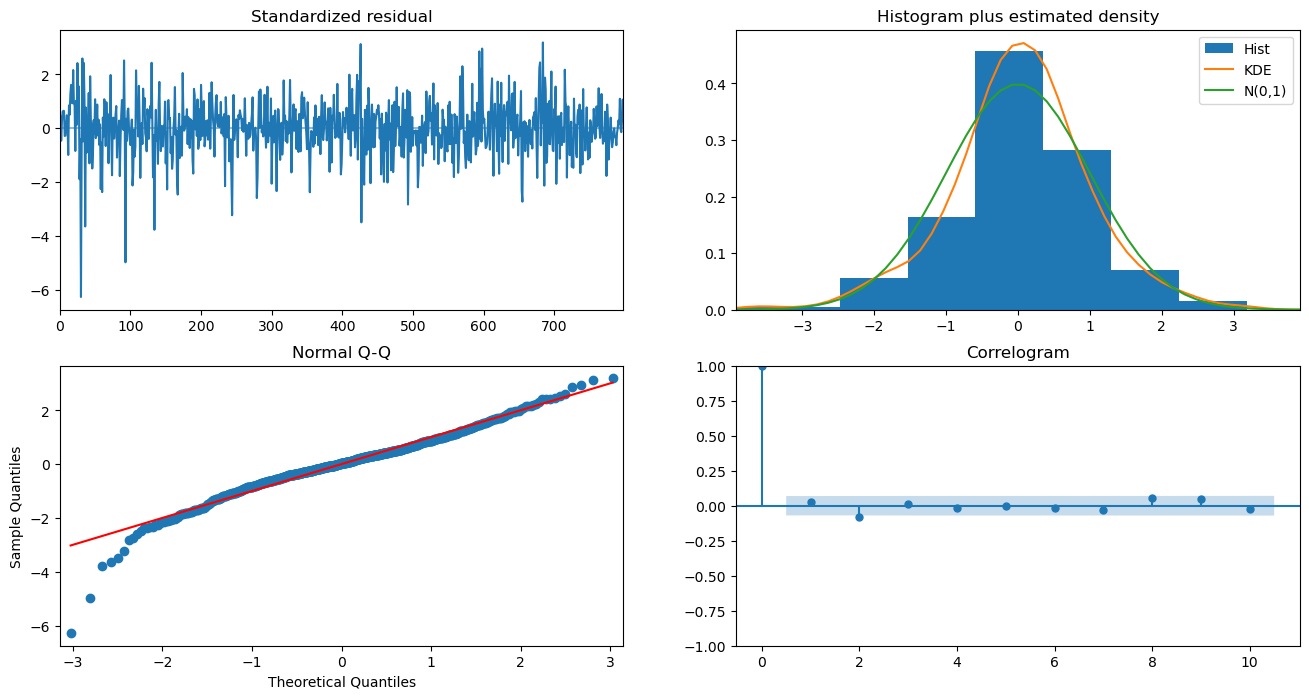

In [60]:
import matplotlib.pyplot as plt

model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [61]:
def predict_one_step():
    prediction = model.predict(n_periods=1)
    return prediction.tolist()[0]

In [74]:
g_p_list = []

for data in g_y_test:
    p = predict_one_step()
    g_p_list.append(p)

    model.update(data)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [80]:
s_p_list = []

for data in s_y_test:
    p = predict_one_step()
    s_p_list.append(p)

    model.update(data)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [75]:
import pandas as pd

g_y_predict_df = pd.DataFrame({"test": g_y_test, "pred": g_p_list})
g_y_predict_df

,test,pred
Date,,
2023-08-31,180.02,180.32
2023-09-01,180.11,180.02
2023-09-05,178.64,180.11
2023-09-06,177.83,178.64
2023-09-07,178.02,177.83
...,...,...
2024-06-11,214.15,213.54
2024-06-12,214.72,214.15
2024-06-13,212.97,214.72


In [81]:
s_y_predict_df = pd.DataFrame({"test": s_y_test, "pred": s_p_list})
s_y_predict_df

,test,pred
Date,,
2023-08-31,28.7873,29.0431
2023-09-01,28.6200,28.7873
2023-09-05,28.0297,28.6200
2023-09-06,28.0101,28.0297
2023-09-07,27.8231,28.0101
...,...,...
2024-06-11,33.7500,34.0300
2024-06-12,34.0000,33.7500
2024-06-13,33.1500,34.0000


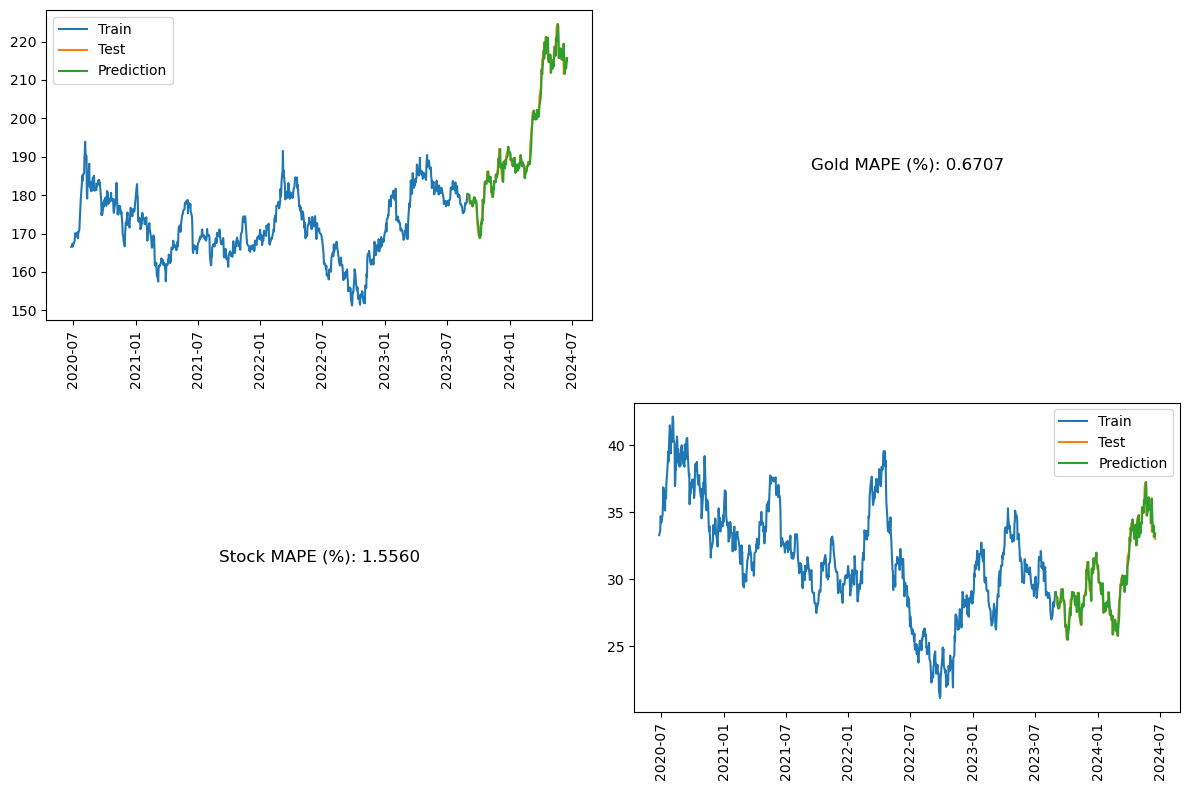

In [87]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 왼쪽 위
axs[0, 0].plot(g_y_train, label='Train')
axs[0, 0].plot(g_y_test, label='Test')
axs[0, 0].plot(g_y_predict_df.pred[-365:], label='Prediction')
axs[0, 0].legend()
axs[0, 0].tick_params(axis='x', rotation=90)  # x축 눈금 레이블 세로로 회전

# 오른쪽 아래
axs[1, 1].plot(s_y_train, label='Train')
axs[1, 1].plot(s_y_test, label='Test')
axs[1, 1].plot(s_y_predict_df.pred[-365:], label='Prediction')
axs[1, 1].legend()
axs[1, 1].tick_params(axis='x', rotation=90)  # x축 눈금 레이블 세로로 회전

# 오른쪽 위에 정보 넣기
axs[0, 1].text(0.5, 0.5, 'Gold MAPE (%): 0.6707', horizontalalignment='center', verticalalignment='center', fontsize=12, transform=axs[0, 1].transAxes)
axs[0, 1].axis('off')  # 축을 보이지 않게 설정

# 왼쪽 아래에 정보 넣기
axs[1, 0].text(0.5, 0.5, 'Stock MAPE (%): 1.5560', horizontalalignment='center', verticalalignment='center', fontsize=12, transform=axs[1, 0].transAxes)
axs[1, 0].axis('off')  # 축을 보이지 않게 설정

# 플롯 보여주기
plt.tight_layout()
plt.show()


In [84]:
import numpy as np

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [85]:
print(f'gold_MAPE (%): {MAPE(g_y_test, g_p_list):.4f}')
print(f'stock_MAPE (%): {MAPE(s_y_test, s_p_list):.4f}')

gold_MAPE (%): 0.6707
stock_MAPE (%): 1.5560


In [502]:
import yfinance as yf

g_df = yf.download('GLD', start='2015-01-01')
s_df = yf.download('GDX', start='2015-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [389]:
import pandas as pd
import numpy as np

# 'Adj Close' 열만 추출
adj_close = g_df['Adj Close']
log_adj_close = np.log(adj_close)
g_df = pd.DataFrame(log_adj_close, columns=['Adj Close'])
s_close = s_df['Adj Close']
log_s_close = np.log(s_close)
s_df = pd.DataFrame(log_s_close, columns=['Adj Close'])
# 결과 출력



In [503]:
g_df = g_df.reset_index()
s_df = s_df.reset_index()

In [504]:
import numpy as np

g_df = g_df.rename(columns={'Date': 'ds', 'Adj Close' : 'y'})
s_df = s_df.rename(columns={'Date': 'ds', 'Adj Close' : 'y'})

In [505]:
g_train_df = g_df.iloc[:int(len(g_df) * 0.8)]
s_train_df = s_df.iloc[:int(len(s_df) * 0.8)]

In [475]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

g_train_len = int(len(g_df) * 0.8)
g_test_len = int(len(g_df) * 0.2)

g_train_size = f'{g_train_len} days'
g_test_size = f'{g_test_len} days'
g_train_df = g_df.iloc[: g_train_len]
g_test_df = g_df.iloc[g_train_len: ]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(g_train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=g_train_size, period='20 days', horizon=g_test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes       

16:12:15 - cmdstanpy - INFO - Chain [1] start processing
16:12:15 - cmdstanpy - INFO - Chain [1] done processing
16:12:27 - cmdstanpy - INFO - Chain [1] start processing
16:12:28 - cmdstanpy - INFO - Chain [1] done processing
16:12:39 - cmdstanpy - INFO - Chain [1] start processing
16:12:40 - cmdstanpy - INFO - Chain [1] done processing
16:12:51 - cmdstanpy - INFO - Chain [1] start processing
16:12:52 - cmdstanpy - INFO - Chain [1] done processing
16:13:04 - cmdstanpy - INFO - Chain [1] start processing
16:13:05 - cmdstanpy - INFO - Chain [1] done processing
16:13:17 - cmdstanpy - INFO - Chain [1] start processing
16:13:18 - cmdstanpy - INFO - Chain [1] done processing
16:13:41 - cmdstanpy - INFO - Chain [1] start processing
16:13:42 - cmdstanpy - INFO - Chain [1] done processing
16:13:55 - cmdstanpy - INFO - Chain [1] start processing
16:13:56 - cmdstanpy - INFO - Chain [1] done processing
16:14:19 - cmdstanpy - INFO - Chain [1] start processing
16:14:20 - cmdstanpy - INFO - Chain [1]

In [394]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

s_train_len = int(len(s_df) * 0.8)
s_test_len = int(len(s_df) * 0.2)

s_train_size = f'{s_train_len} days'
s_test_size = f'{s_test_len} days'
s_train_df = s_df.iloc[: s_train_len]
s_test_df = s_df.iloc[s_train_len: ]

s_mapes = []
for param in param_combinded:
    s_model = Prophet(**param)
    s_model.fit(s_train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    s_cv_df = cross_validation(s_model, initial=s_train_size, period='20 days', horizon=s_test_size, parallel='processes')
    s_df_p = performance_metrics(s_cv_df, rolling_window=1)
    s_mapes.append(s_df_p['mape'].values[0])

s_tuning_result = pd.DataFrame(param_combinded)
s_tuning_result['s_mape'] = s_mapes       

15:26:01 - cmdstanpy - INFO - Chain [1] start processing
15:26:02 - cmdstanpy - INFO - Chain [1] done processing
15:26:15 - cmdstanpy - INFO - Chain [1] start processing
15:26:16 - cmdstanpy - INFO - Chain [1] done processing
15:26:26 - cmdstanpy - INFO - Chain [1] start processing
15:26:27 - cmdstanpy - INFO - Chain [1] done processing
15:26:37 - cmdstanpy - INFO - Chain [1] start processing
15:26:38 - cmdstanpy - INFO - Chain [1] done processing
15:26:50 - cmdstanpy - INFO - Chain [1] start processing
15:26:50 - cmdstanpy - INFO - Chain [1] done processing
15:27:01 - cmdstanpy - INFO - Chain [1] start processing
15:27:03 - cmdstanpy - INFO - Chain [1] done processing
15:27:25 - cmdstanpy - INFO - Chain [1] start processing
15:27:26 - cmdstanpy - INFO - Chain [1] done processing
15:27:38 - cmdstanpy - INFO - Chain [1] start processing
15:27:40 - cmdstanpy - INFO - Chain [1] done processing
15:28:09 - cmdstanpy - INFO - Chain [1] start processing
15:28:10 - cmdstanpy - INFO - Chain [1]

In [496]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
30,1.00,10.00,additive,0.034320
24,1.00,0.05,additive,0.034321
34,5.00,0.10,additive,0.034321
32,5.00,0.05,additive,0.034329
17,0.50,0.05,multiplicative,0.034341
44,10.00,1.00,additive,0.034341
40,10.00,0.05,additive,0.034352
39,5.00,10.00,multiplicative,0.034353
18,0.50,0.10,additive,0.034354
26,1.00,0.10,additive,0.034358


In [396]:
s_tuning_result.sort_values(by='s_mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,s_mape
3,0.05,0.10,multiplicative,0.081863
1,0.05,0.05,multiplicative,0.081963
9,0.10,0.05,multiplicative,0.082551
12,0.10,1.00,additive,0.082786
14,0.10,10.00,additive,0.082850
8,0.10,0.05,additive,0.082918
10,0.10,0.10,additive,0.082992
11,0.10,0.10,multiplicative,0.083047
4,0.05,1.00,additive,0.083141
6,0.05,10.00,additive,0.083174


In [506]:
# 일단 여기 값 위에꺼 보고 수정해야 합니다.
#1.00	10.00	additive
model = Prophet(changepoint_prior_scale=1, 
                seasonality_prior_scale=10.00, 
                seasonality_mode='additive')
model.fit(g_df)
g_future = model.make_future_dataframe(periods=365)
g_forecast = model.predict(g_future)
# 뒤에 일정 조절해서 오늘 날짜랑 비교해봅시다.
# g_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][1370:]

16:55:16 - cmdstanpy - INFO - Chain [1] start processing
16:55:17 - cmdstanpy - INFO - Chain [1] done processing


In [507]:
# 일단 여기 값 위에꺼 보고 수정해야 합니다.
#0.10	1.00	additive
s_model = Prophet(changepoint_prior_scale=0.10, 
                seasonality_prior_scale=10, 
                seasonality_mode='additive')
s_model.fit(s_df)
s_future = s_model.make_future_dataframe(periods=365)
s_forecast = s_model.predict(s_future)
# 뒤에 일정 조절해서 오늘 날짜랑 비교해봅시다.
# s_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][1370:]

16:55:18 - cmdstanpy - INFO - Chain [1] start processing
16:55:19 - cmdstanpy - INFO - Chain [1] done processing


<Axes: >

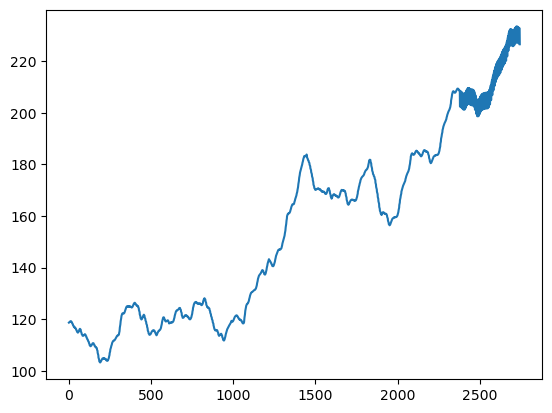

In [508]:
g_forecast.yhat.plot()

In [483]:
g_g_df = g_df.copy()
g_g_df.set_index('ds', inplace=True)

g_g_forecast = g_forecast.copy()
g_g_forecast = g_forecast.set_index('ds')

g_g_df.index = pd.to_datetime(g_g_df.index)
g_g_forecast.index = pd.to_datetime(g_g_forecast.index)

# 여기는 위에서 로그 씌워서 여기는 지수 씌워줌
g_g_df = g_g_df.apply(np.exp)
g_g_forecast = g_g_forecast.apply(np.exp)

In [472]:
s_g_df = s_df.copy()
s_g_df.set_index('ds', inplace=True)

s_g_forecast = s_forecast.copy()
s_g_forecast = s_forecast.set_index('ds')

s_g_df.index = pd.to_datetime(s_g_df.index)
s_g_forecast.index = pd.to_datetime(s_g_forecast.index)

# 여기는 위에서 로그 씌워서 여기는 지수 씌워줌
s_g_df = s_g_df.apply(np.exp)
s_g_forecast = s_g_forecast.apply(np.exp)

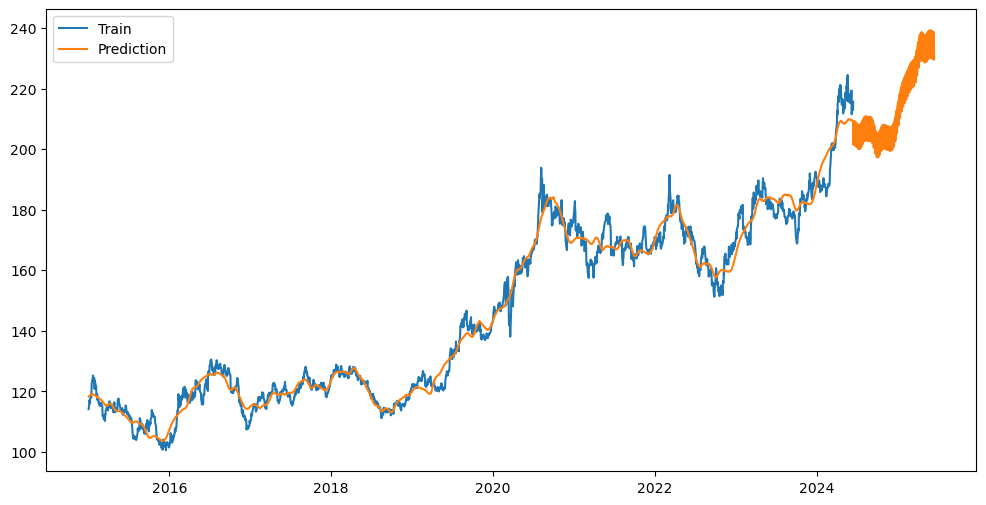

In [484]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(g_g_df[['y']], label='Train')
plt.plot(g_g_forecast[['yhat']], label='Prediction')
plt.legend()
plt.show()

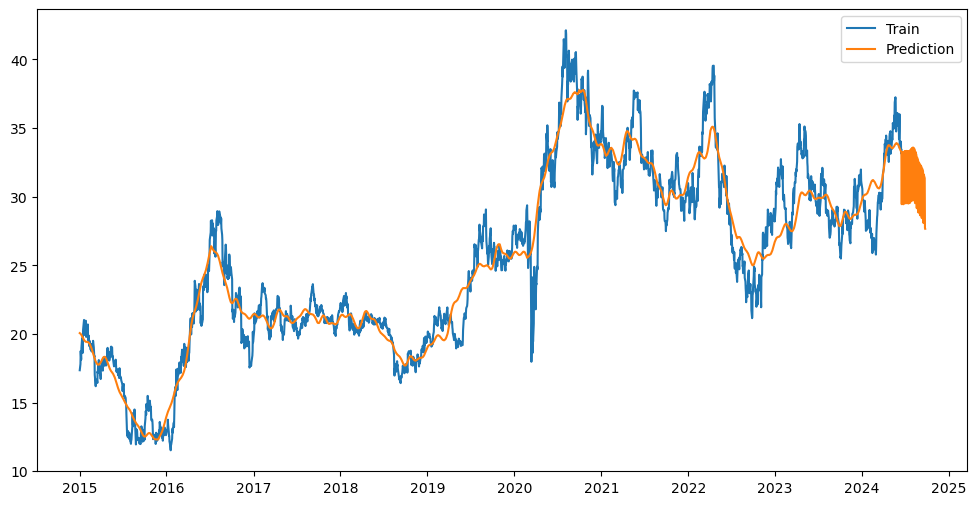

In [474]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(s_g_df[['y']], label='Train')
plt.plot(s_g_forecast[['yhat']], label='Prediction')
plt.legend()
plt.show()

In [403]:
s_g_forecast[['yhat', 'yhat_lower', 'yhat_upper']][2000:]

,yhat,yhat_lower,yhat_upper
ds,,,
2022-12-12,25.744575,23.563029,28.141021
2022-12-13,25.751611,23.547446,27.993915
2022-12-14,25.776898,23.663530,28.294301
2022-12-15,25.810518,23.597823,28.337810
2022-12-16,25.846432,23.770131,28.198276
...,...,...,...
2025-06-10,37.334633,19.442631,68.742507
2025-06-11,37.303612,19.154713,67.721049
2025-06-12,37.282035,19.075288,66.931721


C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


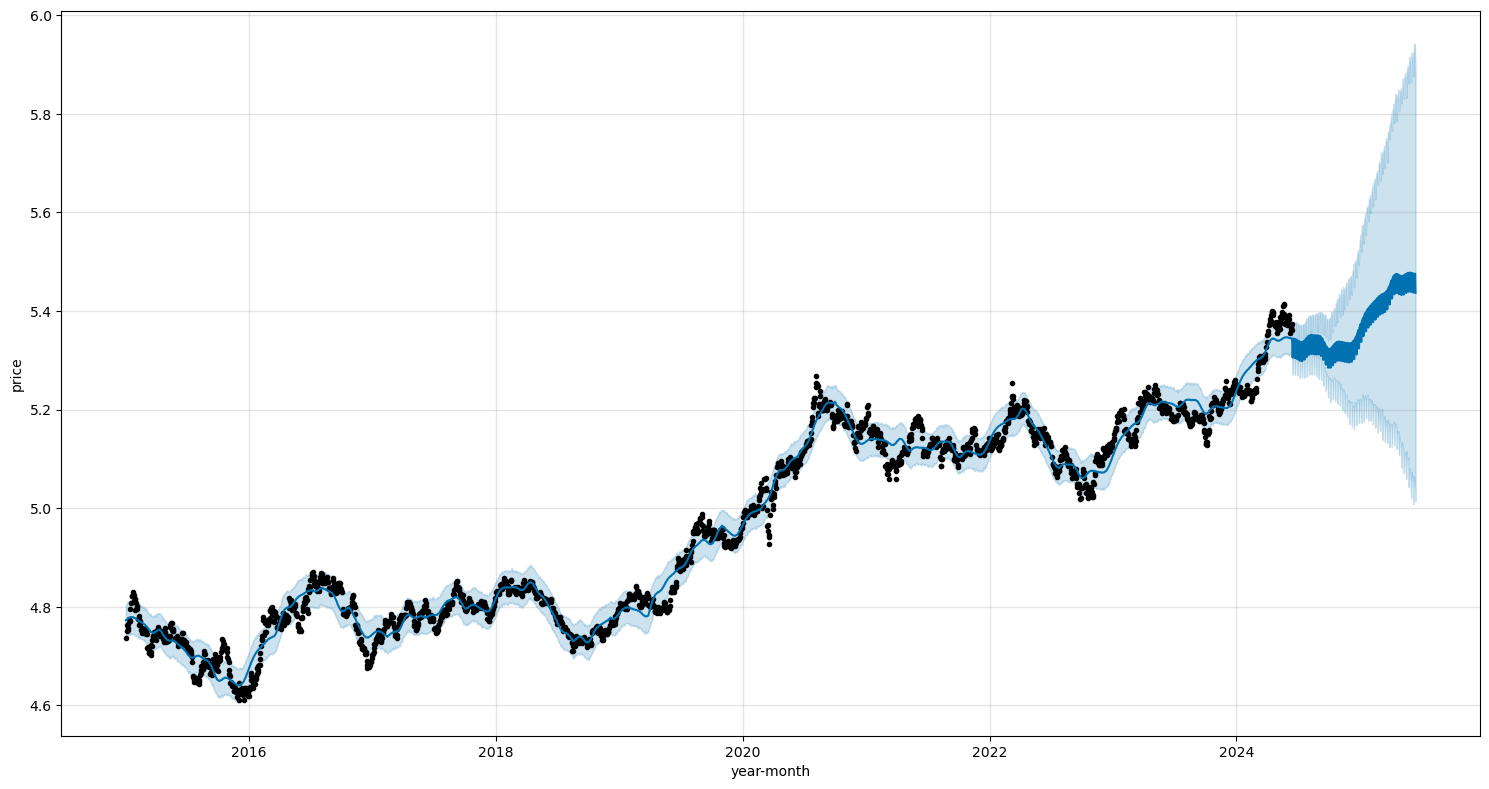

In [485]:
model.plot(g_forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

In [436]:
g_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,4.783866,4.740526,4.806130,4.783866,4.783866,-0.011060,-0.011060,-0.011060,0.011382,0.011382,0.011382,-0.022442,-0.022442,-0.022442,0.0,0.0,0.0,4.772806
1,2015-01-05,4.781328,4.740173,4.808063,4.781328,4.781328,-0.007353,-0.007353,-0.007353,0.010640,0.010640,0.010640,-0.017993,-0.017993,-0.017993,0.0,0.0,0.0,4.773975
2,2015-01-06,4.780482,4.742002,4.808808,4.780482,4.780482,-0.005823,-0.005823,-0.005823,0.010737,0.010737,0.010737,-0.016560,-0.016560,-0.016560,0.0,0.0,0.0,4.774660
3,2015-01-07,4.779636,4.741311,4.809785,4.779636,4.779636,-0.004200,-0.004200,-0.004200,0.010958,0.010958,0.010958,-0.015157,-0.015157,-0.015157,0.0,0.0,0.0,4.775437
4,2015-01-08,4.778790,4.743818,4.808903,4.778790,4.778790,-0.002636,-0.002636,-0.002636,0.011153,0.011153,0.011153,-0.013789,-0.013789,-0.013789,0.0,0.0,0.0,4.776154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,2025-06-10,5.439444,5.025104,5.897637,5.005717,5.872384,0.035791,0.035791,0.035791,0.010737,0.010737,0.010737,0.025054,0.025054,0.025054,0.0,0.0,0.0,5.475234
2740,2025-06-11,5.439802,5.029112,5.898358,5.005247,5.875561,0.035516,0.035516,0.035516,0.010958,0.010958,0.010958,0.024558,0.024558,0.024558,0.0,0.0,0.0,5.475318
2741,2025-06-12,5.440160,5.034036,5.910966,5.004585,5.878738,0.035229,0.035229,0.035229,0.011153,0.011153,0.011153,0.024077,0.024077,0.024077,0.0,0.0,0.0,5.475390
2742,2025-06-13,5.440519,5.029687,5.898472,5.003598,5.881682,0.034989,0.034989,0.034989,0.011382,0.011382,0.011382,0.023607,0.023607,0.023607,0.0,0.0,0.0,5.475508


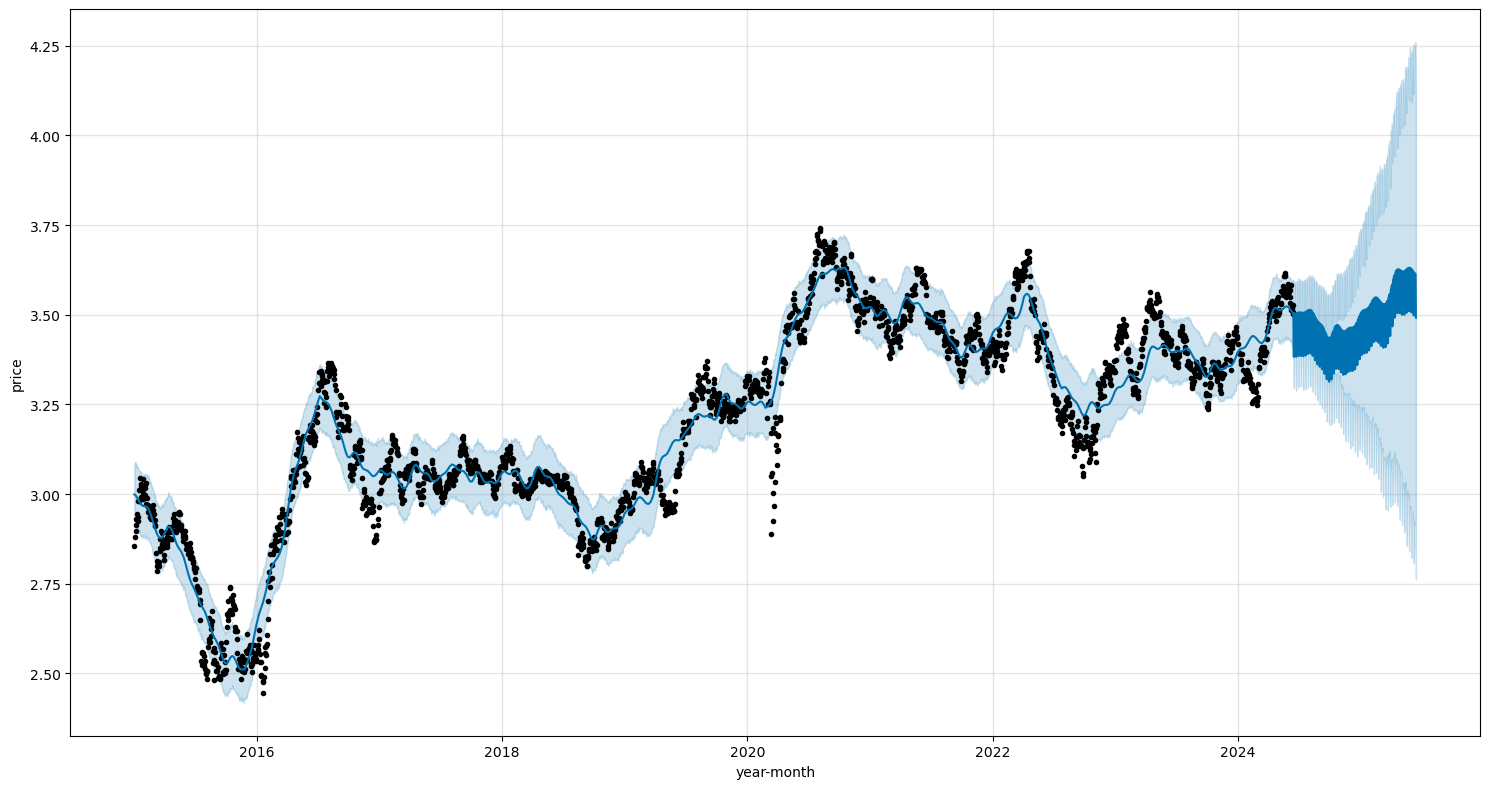

In [455]:
s_model.plot(s_forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

In [406]:
s_g_forecast[['yhat', 'yhat_lower', 'yhat_upper']][2380:]

,yhat,yhat_lower,yhat_upper
ds,,,
2024-06-16,30.135147,27.578411,32.800872
2024-06-17,33.324147,30.427820,36.481187
2024-06-18,33.309438,30.511217,36.305170
2024-06-19,33.316411,30.408770,36.466720
2024-06-20,33.331563,30.608970,36.435076
...,...,...,...
2025-06-10,37.334633,19.442631,68.742507
2025-06-11,37.303612,19.154713,67.721049
2025-06-12,37.282035,19.075288,66.931721


In [407]:
g_list_df = pd.DataFrame(g_g_forecast['yhat'])['2024-06-01':]

In [408]:
s_list_df = pd.DataFrame(s_g_forecast['yhat'])['2024-06-01':]

<Axes: xlabel='ds'>

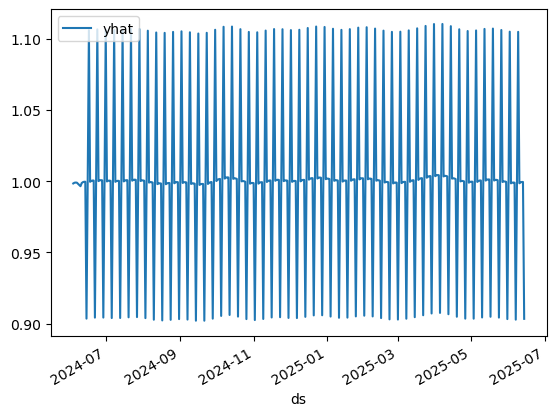

In [417]:
s_list_df.plot()

In [409]:
g_list_df = g_list_df / g_list_df.shift(1)
g_list_df = g_list_df.dropna()
g_list_df

,yhat
ds,
2024-06-04,0.999895
2024-06-05,1.000018
2024-06-06,0.999997
2024-06-07,1.000040
2024-06-10,0.998768
...,...
2025-06-10,0.999945
2025-06-11,1.000083
2025-06-12,1.000072


In [410]:
s_list_df = s_list_df / s_list_df.shift(1)
s_list_df = s_list_df.dropna()
s_list_df

,yhat
ds,
2024-06-04,0.998403
2024-06-05,0.998904
2024-06-06,0.999038
2024-06-07,0.998959
2024-06-10,0.996479
...,...
2025-06-10,0.998539
2025-06-11,0.999169
2025-06-12,0.999422


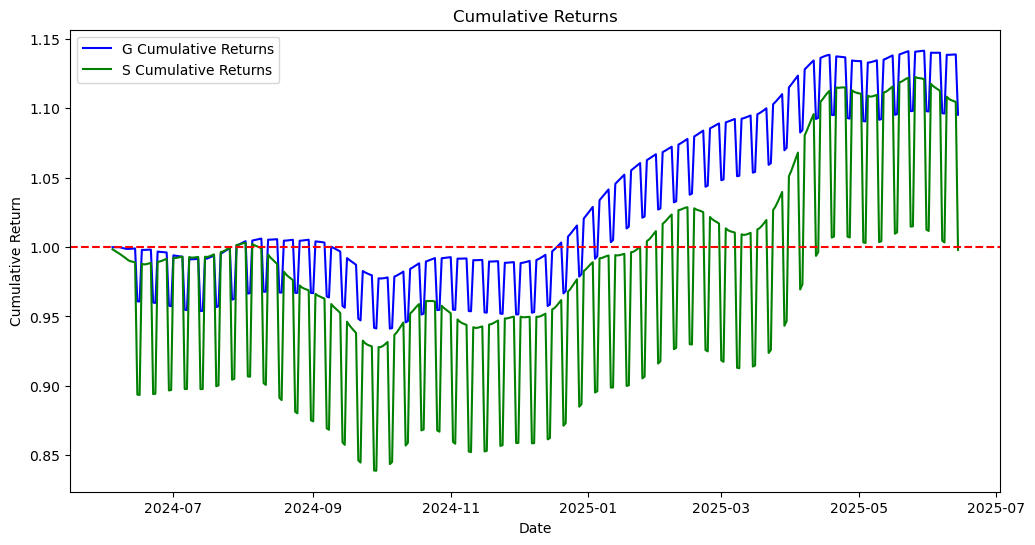

In [515]:
g_cumulative_returns = g_list_df.cumprod()
s_cumulative_returns = s_list_df.cumprod()
# 결과 플롯
plt.figure(figsize=(12, 6))
plt.plot(g_cumulative_returns, label='G Cumulative Returns', color='blue')
plt.plot(s_cumulative_returns, label='S Cumulative Returns', color='green')
plt.axhline(y=1, color='r', linestyle='--')  # y=1에 수평선 추가
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()  # 범례 추가
plt.show()

<Axes: xlabel='ds'>

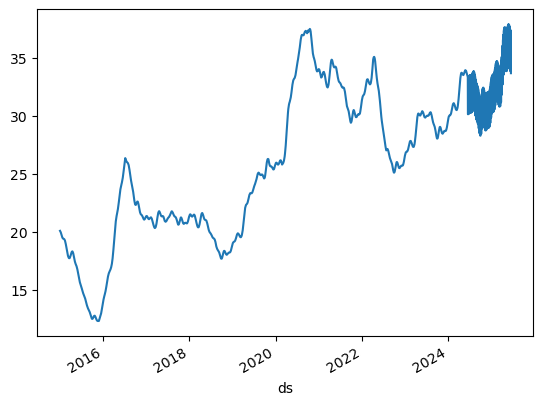

In [416]:
s_g_forecast['yhat'].plot()

로그 없애서 그래프 추가 해야 합니다. arima모델 전에 전처리 한번 해서 나와야 합니다잉